In [12]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [8]:
diamonds = pd.read_csv(r"..\dataset\diamonds.csv")

The x,y and z values in this dataset stand for length, width and depth in milimeters

In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
diamond_train, diamond_test = train_test_split(diamonds, test_size=0.3, stratify=diamonds['color'], random_state=42)
print(diamond_train.shape, diamond_test.shape)

(37758, 11) (16182, 11)


In [65]:
features= ['carat']
dt = DecisionTreeClassifier(max_depth = 4) # Increase max_depth to see effect in the plot
dt.fit(diamond_train[features], diamond_train['cut'])

DecisionTreeClassifier(max_depth=4)

In [66]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

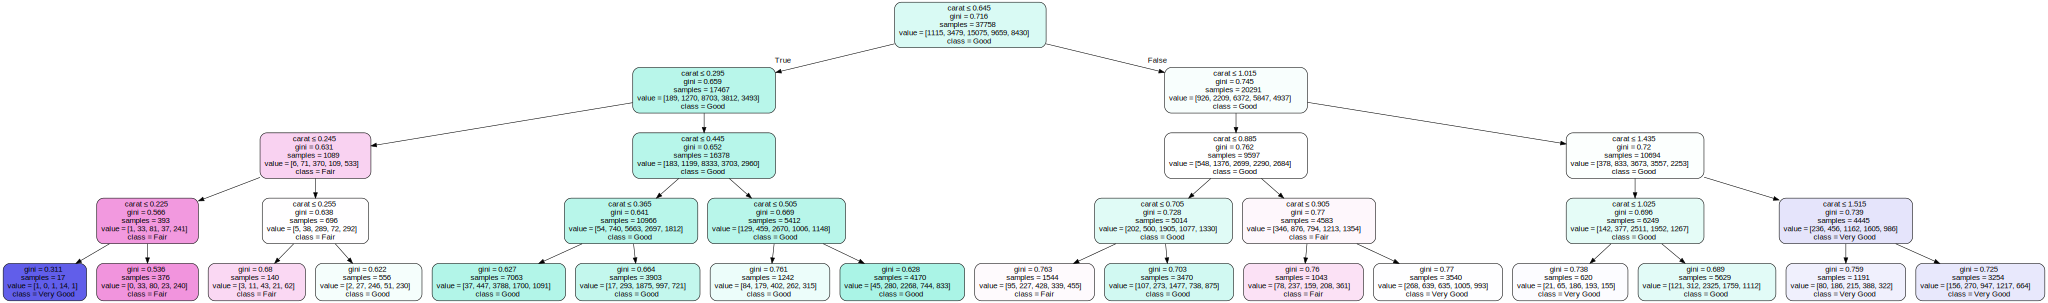

In [67]:
plot_tree_classification(dt, features, diamonds.cut.unique())

Een paar gini zijn niet hoog, maar de rest zijn allemaal redelijk hoog dus ik denk dat de accuracy van deze set maar rond de 40% zal liggen.

In [68]:
predictions = dt.predict(diamonds[features])

In [69]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [70]:
predictionsOnTrainset = dt.predict(diamond_train[features])
predictionsOnTestset = dt.predict(diamond_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, diamond_train.cut)
accuracyTest = calculate_accuracy(predictionsOnTestset, diamond_test.cut)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.4321203453572753
Accuracy on test set 0.43344456803856135


De accuracy is 43%. Dit is niet veel hoger dan mijn voorspelling. Carat heeft niet genoeg invloed op de cut om het makkelijk te verdelen.